## Imports
Includes our own libraries

In [71]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [72]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from lib.imageutil import show_image, median_canny

## Template matching

In [73]:
!wget https://i.stack.imgur.com/bGkYx.jpg -O ./tmp/waldo.jpg

--2023-07-14 07:26:55--  https://i.stack.imgur.com/bGkYx.jpg
Resolving i.stack.imgur.com (i.stack.imgur.com)... 151.101.240.193, 151.101.240.193
Connecting to i.stack.imgur.com (i.stack.imgur.com)|151.101.240.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 770445 (752K) [image/jpeg]
Saving to: ‘./tmp/waldo.jpg’

./tmp/waldo.jpg     100%[===================>] 752.39K  --.-KB/s    in 0.09s   

2023-07-14 07:26:55 (8.11 MB/s) - ‘./tmp/waldo.jpg’ saved [770445/770445]



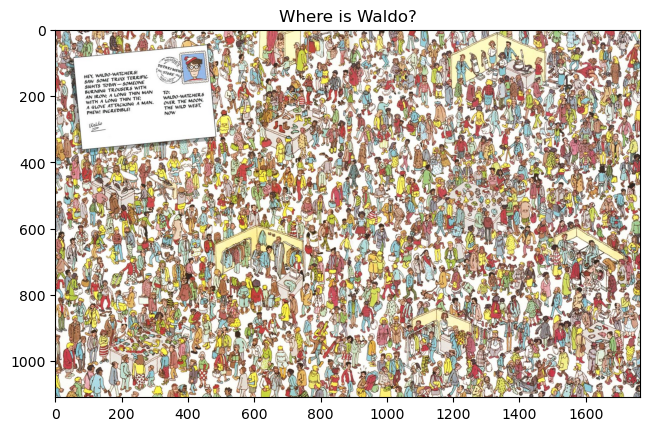

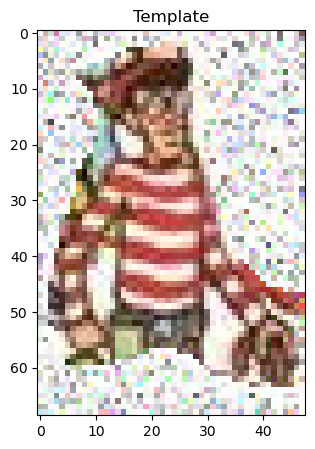

min_val: -19284642.0, max_val: 23286922.0, min_loc: (12, 904), max_loc: (722, 179)


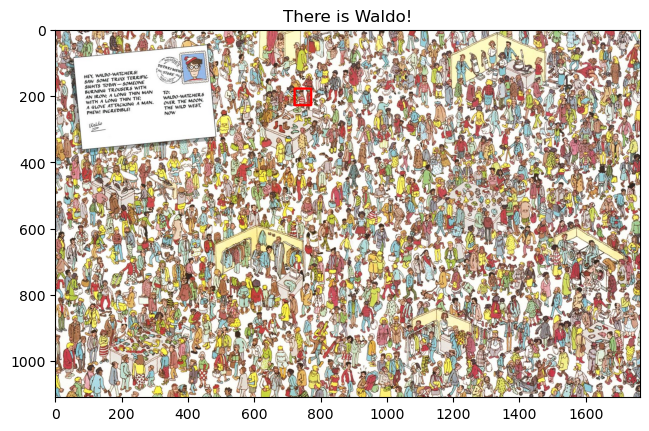

In [90]:
image = cv2.imread('./tmp/waldo.jpg')
show_image(image, 'Where is Waldo?', 12)

# load template image
# Note: we cut this originally out of the image and filled the parts not belonging to Waldo
# with random HSV-noise.
template = cv2.imread('../images/waldo_template.jpg')
show_image(template, 'Template')

result = cv2.matchTemplate(image, template, cv2.TM_CCOEFF)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

print(f"min_val: {min_val}, max_val: {max_val}, min_loc: {min_loc}, max_loc: {max_loc}")

#show bounding box where waldo is located
top_left = max_loc
bottom_right = (top_left[0] + 50, top_left[1] + 50)
cv2.rectangle(image, top_left, bottom_right, (0,0,255), 5)

show_image(image, 'There is Waldo!', 12)

## Harris corner detection
`cv2.cornerHarris(input image, block size, ksize, k)`

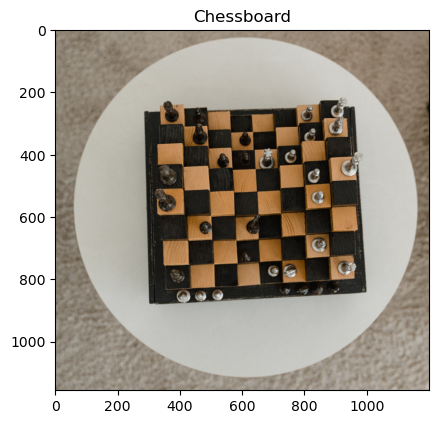

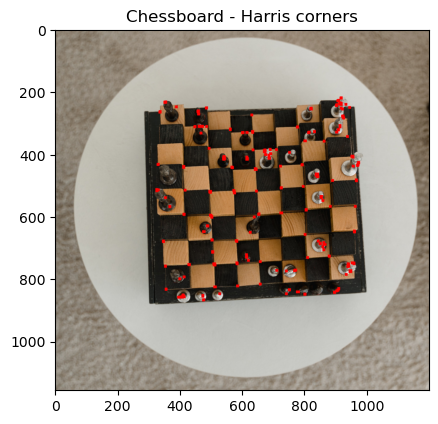

In [108]:
image = cv2.imread('../images/chessboard.jpg')
show_image(image, 'Chessboard')

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

harris_corners = cv2.cornerHarris(np.float32(gray), 3, 5, 0.15)

# use dilation of the corner points to enlarge them\
kernel = np.ones((5,5),np.uint8)
harris_corners = cv2.dilate(harris_corners, kernel, iterations = 2)

# threshold for an optimal value, varies depending on the image
image[harris_corners > 0.1 * harris_corners.max() ] = [0, 0, 255]

show_image(image, 'Chessboard - Harris corners')

## OpenCV Good Feature
Another great OpenCV function is `cv2.goodFeaturesToTrack(input image, maxCorners, qualityLevel, minDistance)`

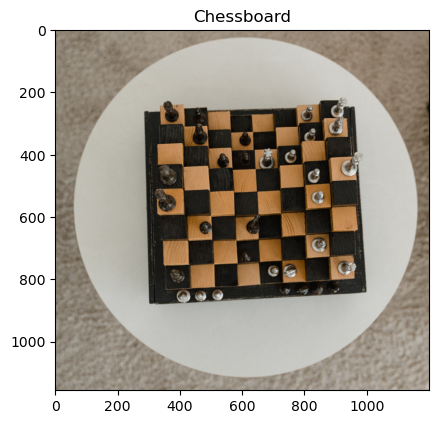

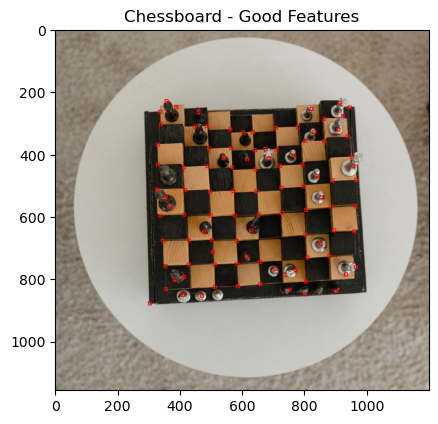

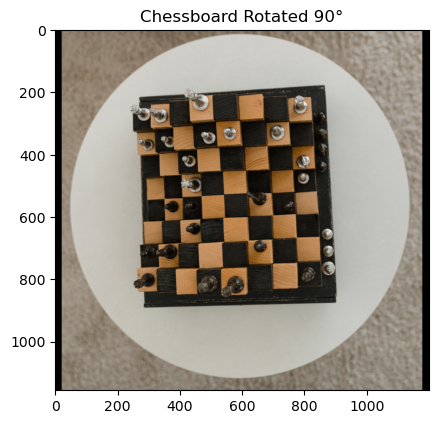

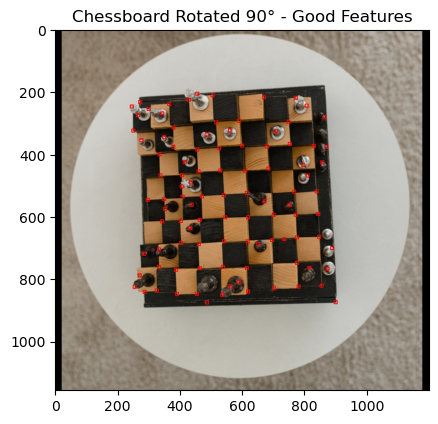

In [119]:
image = cv2.imread('../images/chessboard.jpg')
show_image(image, 'Chessboard')

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

features = cv2.goodFeaturesToTrack(gray, 100, 0.0005, 30)

result = image.copy()
for feature in features:
    x, y = feature[0]
    x = int(x)
    y = int(y)
    cv2.rectangle(result,(x-5,y-5),(x+5,y+5),(0,0,255), 2)
    
show_image(result, "Chessboard - Good Features")

# rotate image and try to find the features again
h, w = image.shape[:2]
T = cv2.getRotationMatrix2D((w/2, h/2), 90, 1)
rotated = cv2.warpAffine(image, T, (w, h))
show_image(rotated, "Chessboard Rotated 90°")

gray = cv2.cvtColor(rotated, cv2.COLOR_BGR2GRAY)
features = cv2.goodFeaturesToTrack(gray, 100, 0.0005, 30)

result = rotated.copy()
for feature in features:
    x, y = feature[0]
    x = int(x)
    y = int(y)
    cv2.rectangle(result,(x-5,y-5),(x+5,y+5),(0,0,255), 2)
    
show_image(result, "Chessboard Rotated 90° - Good Features")